<a href="https://colab.research.google.com/github/SowndaryaBhaskaran/CodeAlpha_Project_CarPricePrediction/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [18]:


# Upload your kaggle.json file
from google.colab import files
files.upload()

# Create a directory for Kaggle datasets
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


# Download the dataset
!kaggle datasets download -d vijayaadithyanvg/car-price-predictionused-cars

# Unzip the dataset
!unzip car-price-predictionused-cars.zip


Saving kaggle.json to kaggle (2).json
Dataset URL: https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars
License(s): CC0-1.0
car-price-predictionused-cars.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  car-price-predictionused-cars.zip
replace car data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [19]:
# Load the dataset
df = pd.read_csv('car data.csv')

# Display the first few rows of the dataset
df.head()

# Display summary information
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Driven_kms,0
Fuel_Type,0
Selling_type,0
Transmission,0
Owner,0


In [20]:
# Fill missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with mode


# Check for remaining missing values
print(df.isnull().sum())



Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [21]:
# Load the dataset
df = pd.read_csv('car data.csv')

# Fill missing values for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])  # Fill with mode


# Check for remaining missing values
print(df.isnull().sum())

# Select features and target variable
X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [22]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns
numerical_cols = X.select_dtypes(exclude=['object']).columns

# Create a preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  # Scale numeric features
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


In [24]:
# Create a Random Forest Regressor pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Make predictions
rf_predictions = rf_pipeline.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
print(f"Random Forest - MSE: {rf_mse}, R2: {rf_r2}")


Random Forest - MSE: 0.7710541483606554, R2: 0.9665276933745053


In [25]:
# Create a Linear Regression pipeline
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', LinearRegression())])

# Train the model
lr_pipeline.fit(X_train, y_train)

# Make predictions
lr_predictions = lr_pipeline.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)
print(f"Linear Regression - MSE: {lr_mse}, R2: {lr_r2}")


Linear Regression - MSE: 2.2878270623726618, R2: 0.9006829168863724


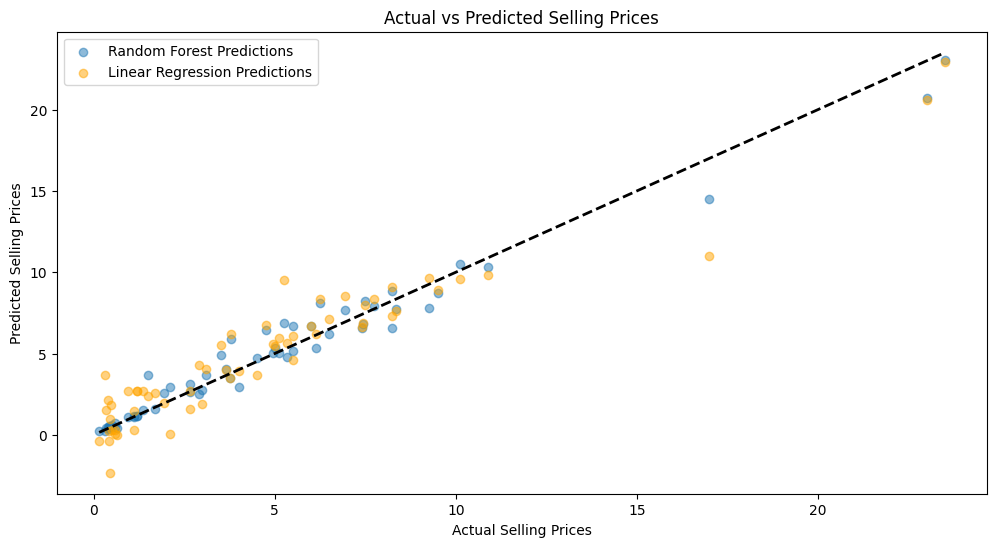

In [26]:
# Visualize the actual vs predicted prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_predictions, alpha=0.5, label='Random Forest Predictions')
plt.scatter(y_test, lr_predictions, alpha=0.5, label='Linear Regression Predictions', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Selling Prices')
plt.ylabel('Predicted Selling Prices')
plt.title('Actual vs Predicted Selling Prices')
plt.legend()
plt.show()
